In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("gdit").project("aerial-airport")
dataset = project.version(1).download("yolov7")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=14c7f3c41c8ad856017b81030f52352a422740c515b148185f34e9e3757b320c
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypars

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Aerial-Airport-1 in yolov7pytorch:: 100%|██████████| 1632/1632 [00:00<00:00, 2313.62it/s]


In [2]:
!git clone https://github.com/WongKinYiu/yolov7.git

Cloning into 'yolov7'...
remote: Enumerating objects: 1127, done.
remote: Total 1127 (delta 0), reused 0 (delta 0), pack-reused 1127
Receiving objects: 100% (1127/1127), 69.93 MiB | 21.56 MiB/s, done.
Resolving deltas: 100% (525/525), done.


In [3]:
%cd /content/yolov7
!pip install -r requirements.txt

/content/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.2 MB/s eta 0:00:00


In [4]:
!curl -OL https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt --output /content/yolov7/yolov7_training.pt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72.1M  100 72.1M    0     0  29.9M      0  0:00:02  0:00:02 --:--:-- 36.5M


In [12]:
%cd /content/yolov7/
!python train.py --batch 16 --epochs 10 --data /content/Aerial-Airport-1/data.yaml  --weights /content/yolov7/yolov7_training.pt --device 0

/content/yolov7
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='/content/Aerial-Airport-1/data.yaml', device='0', entity=None, epochs=10, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='/content/yolov7/yolov7_training.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=

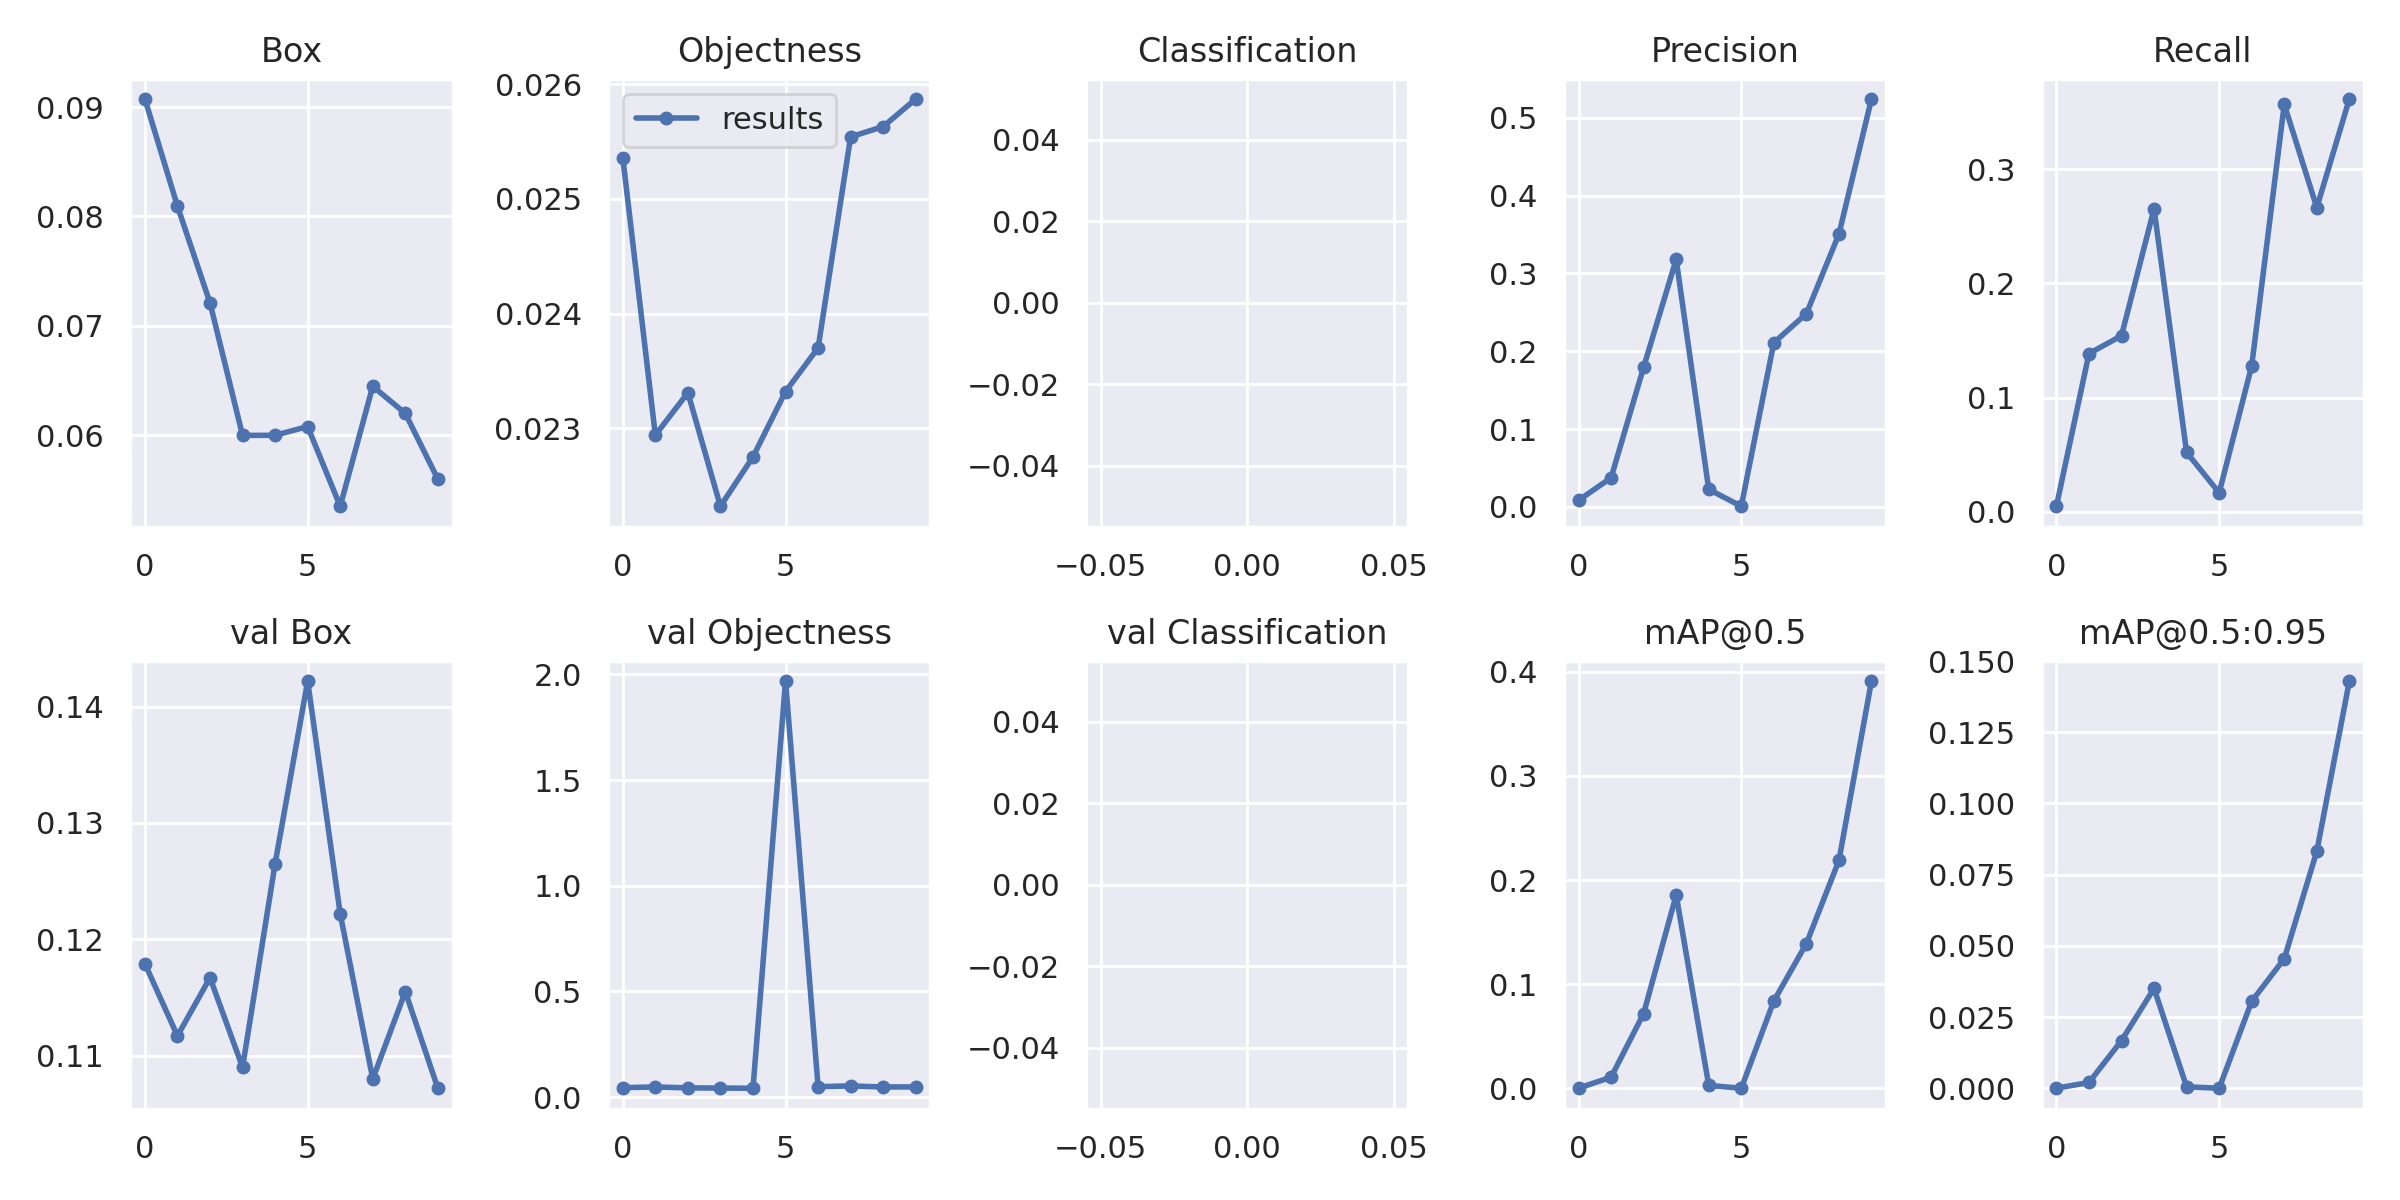

In [13]:
from PIL import Image 
results_training = Image.open('/content/yolov7/runs/train/exp2/results.png')
display(results_training)

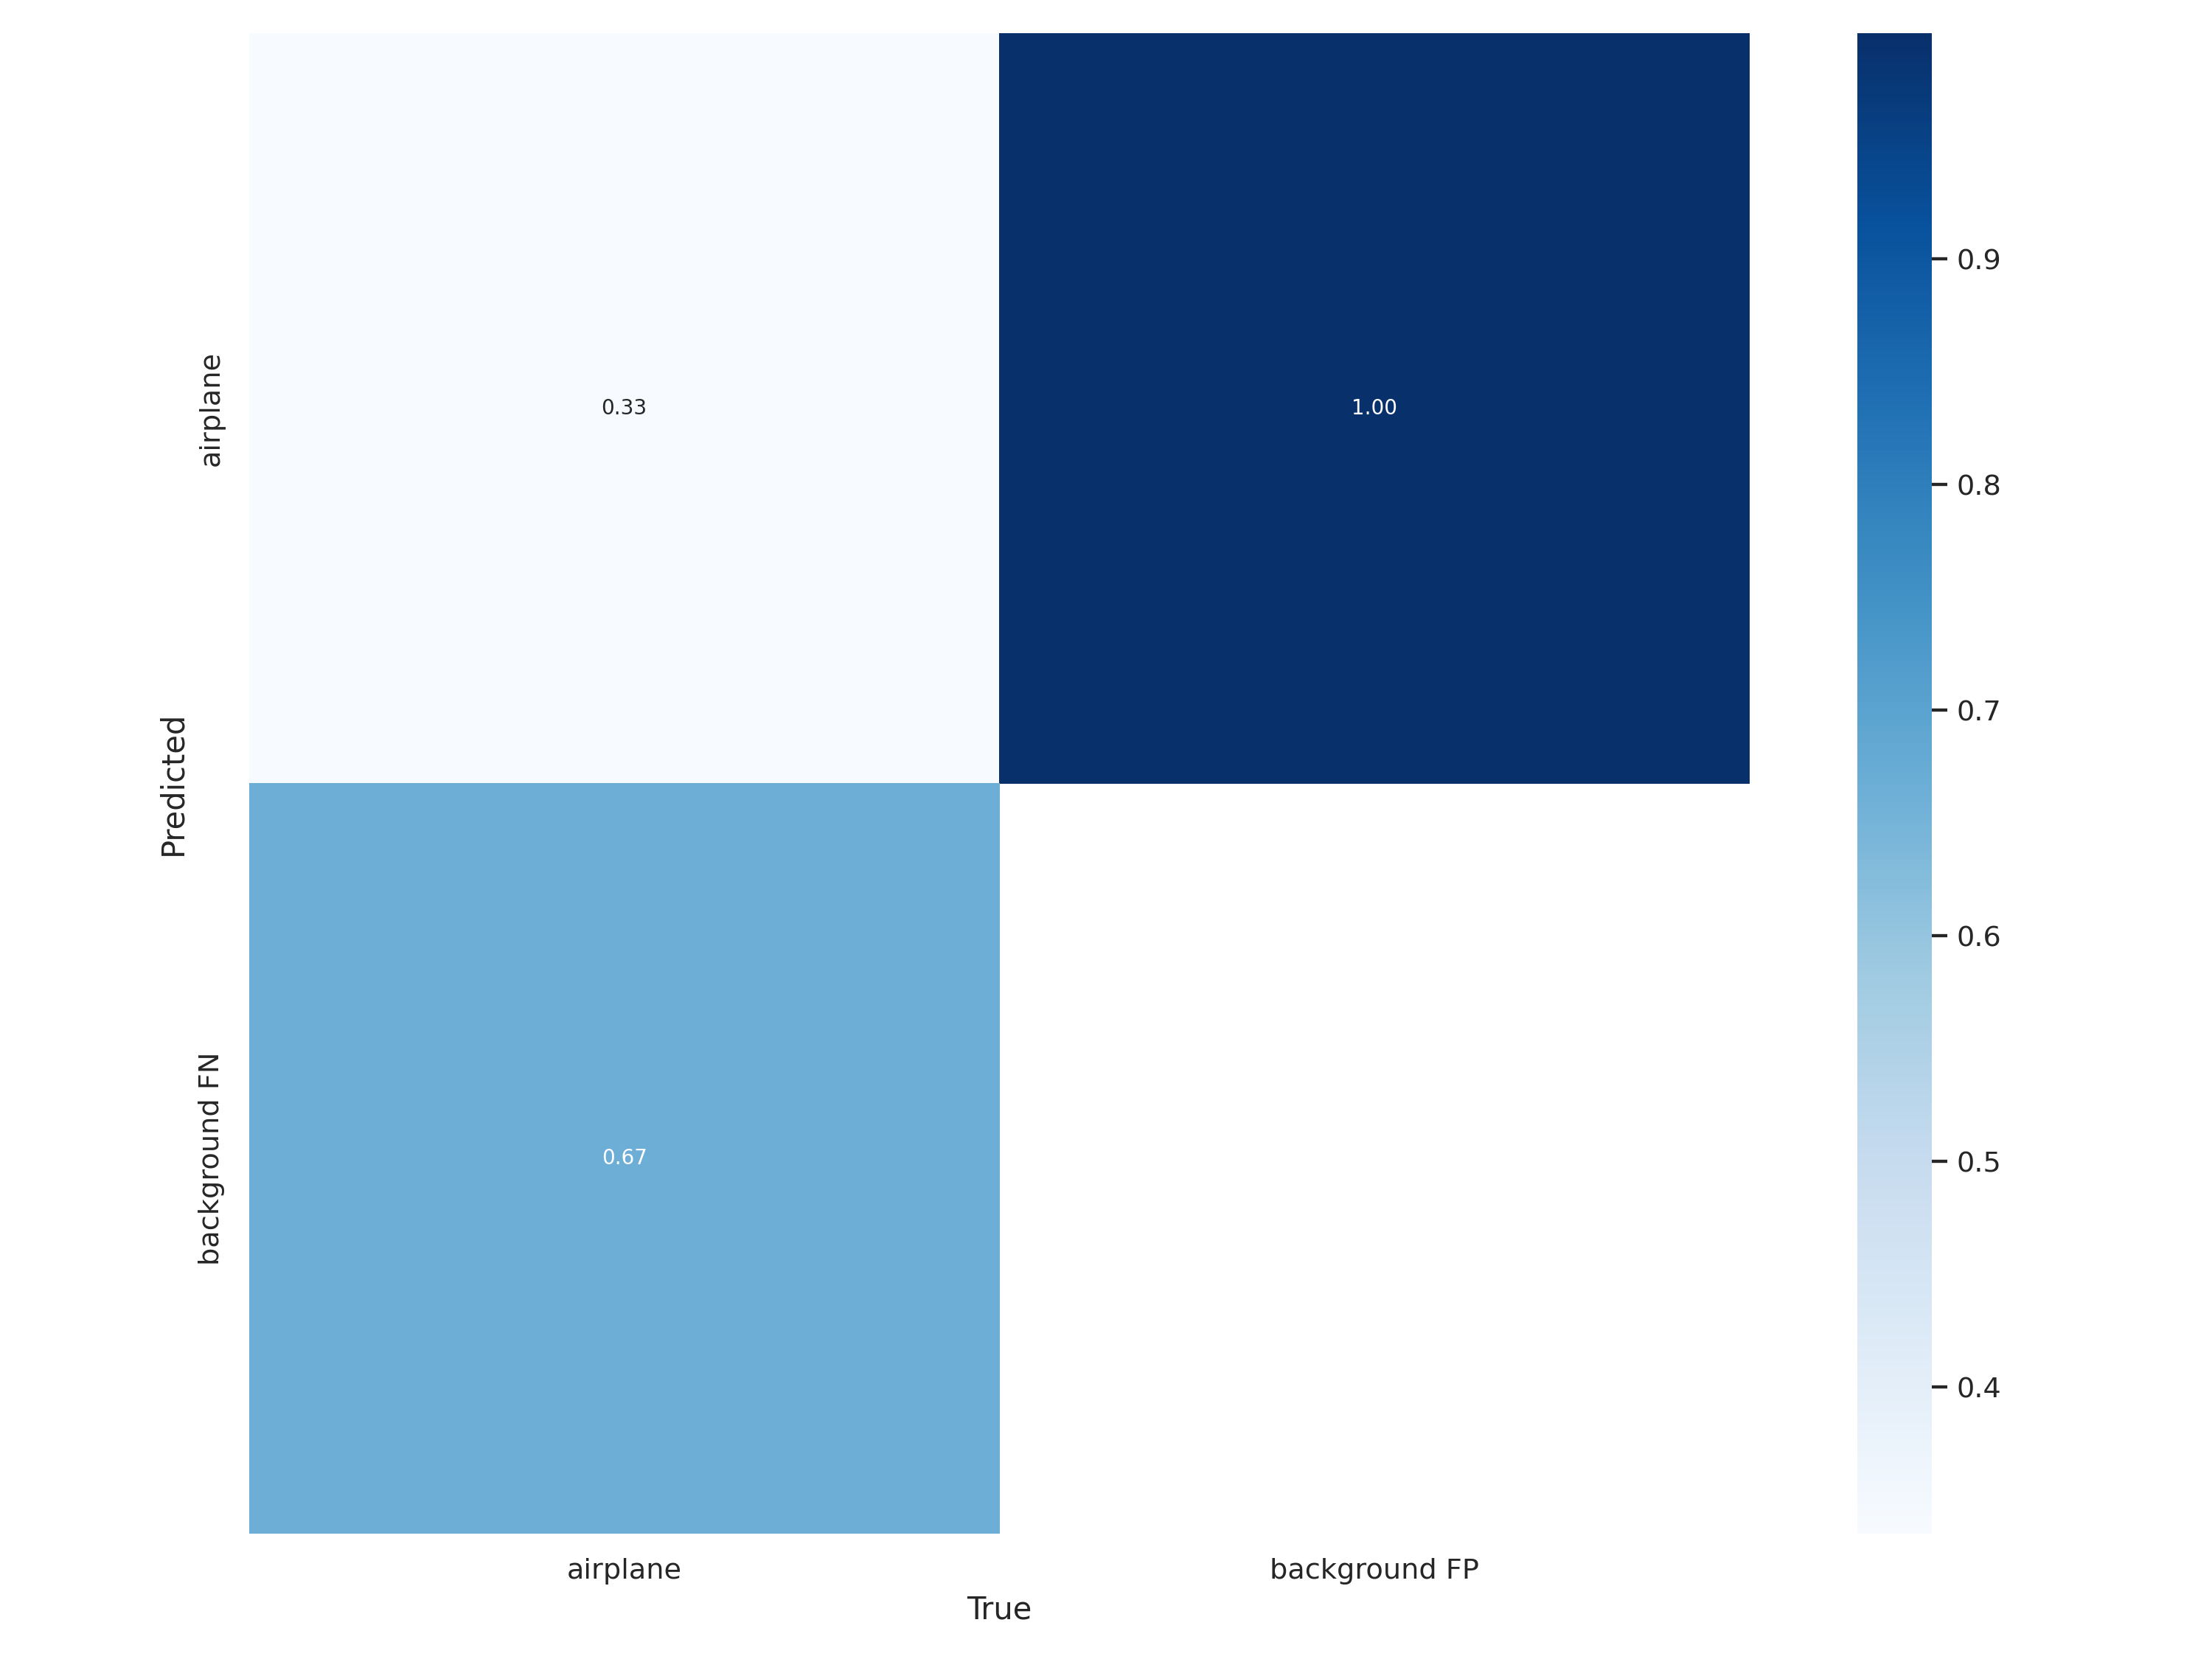

In [14]:
confusion = Image.open('/content/yolov7/runs/train/exp2/confusion_matrix.png')
display(confusion)

In [15]:
%cd /content/yolov7/
!python detect.py --source /content/Aerial-Airport-1/test/images --weights /content/yolov7/runs/train/exp2/weights/best.pt 

/content/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/Aerial-Airport-1/test/images', update=False, view_img=False, weights=['/content/yolov7/runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 tr

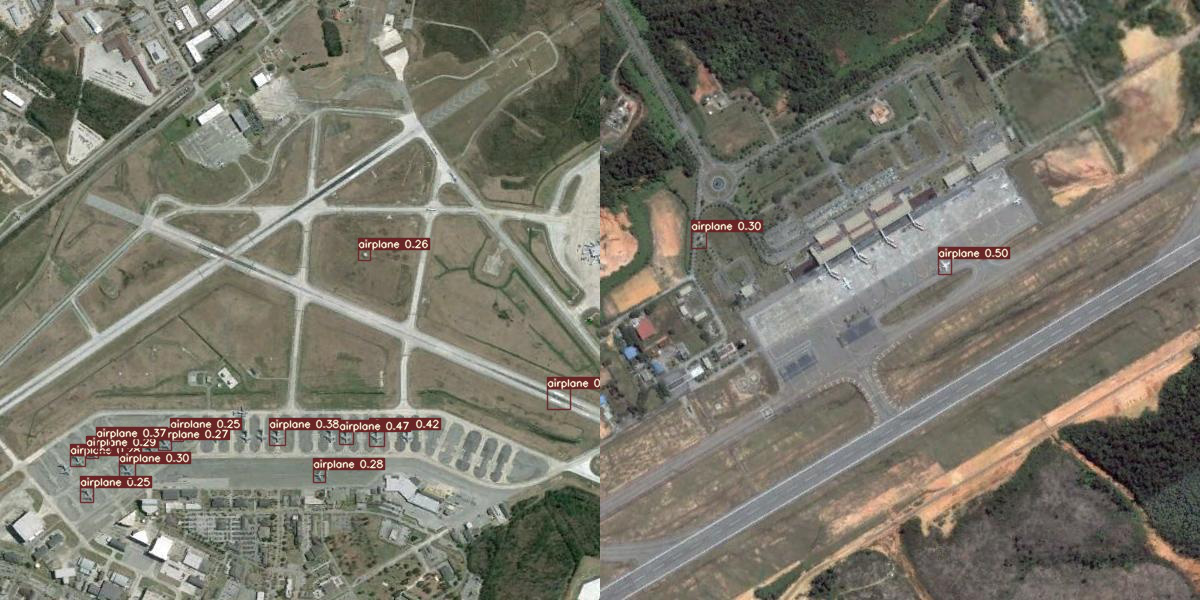

In [16]:
import numpy as np

im1 = Image.open('/content/yolov7/runs/detect/exp2/airport_104_jpg.rf.9ab0c64ca392b7f6d0b1fe5dc12b2a8c.jpg')
im2 = Image.open('/content/yolov7/runs/detect/exp2/airport_133_jpg.rf.33d2673a8d272cf9aabbe29e49ea251a.jpg')

pred = Image.fromarray(np.hstack((np.array(im1),np.array(im2))))
display(pred)